In [1]:
# Data
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

# データを読む

In [2]:
# read data
item_df = pd.read_csv('./item_mst_UTF-8.csv')
user_df = pd.read_csv('./user_mst.csv')
pos_data = pd.read_csv('./purchase_log.csv')
display(item_df.head(2),user_df.head(2),pos_data.head(2))

,item_id,item_name,category_1,category_2,category_3,amount,unit_price
0,s_00001,弁当（和風）,食料,冷蔵,弁当,600,500
1,s_00002,弁当（洋風）,食料,冷蔵,弁当,700,550


,user_id,shop_flg
0,34860083,0
1,45587843,0


,receipt_no,user_id,item_id,unit,date_jst
0,5307465824,34860083,s_00001,1.0,2020-10-04 00:06:47
1,5307465824,34860083,s_00004,1.0,2020-10-04 00:06:47


In [3]:
# IDPOSデータに転換
tmp_df = pd.merge(pos_data,item_df,on = 'item_id',how = 'left')
data = pd.merge(tmp_df,user_df,on='user_id')
data.head(2)

,receipt_no,user_id,item_id,unit,date_jst,item_name,category_1,category_2,category_3,amount,unit_price,shop_flg
0,5307465824,34860083,s_00001,1.0,2020-10-04 00:06:47,弁当（和風）,食料,冷蔵,弁当,600,500,0
1,5307465824,34860083,s_00004,1.0,2020-10-04 00:06:47,唐揚げ,食料,ホットスナック,揚げ物,160,250,0


In [4]:
# rename columns
data = data.rename(columns = {'unit':'salescnt','date_jst':'datetime','amount':'volume','unit_price':'salesprice'})

# データ前処理


In [5]:
# データフレームの各列のデータ型を確認
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31130 entries, 0 to 31129
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   receipt_no  31130 non-null  int64  
 1   user_id     31130 non-null  int64  
 2   item_id     31130 non-null  object 
 3   salescnt    31130 non-null  float64
 4   datetime    31130 non-null  object 
 5   item_name   31130 non-null  object 
 6   category_1  31130 non-null  object 
 7   category_2  31130 non-null  object 
 8   category_3  31130 non-null  object 
 9   volume      31130 non-null  int64  
 10  salesprice  31130 non-null  int64  
 11  shop_flg    31130 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 2.9+ MB


In [6]:
# データ型を変換する
data['datetime'] = pd.to_datetime(data['datetime'])

In [7]:
# データ分布を確認する
data.describe()

,receipt_no,user_id,salescnt,datetime,volume,salesprice,shop_flg
count,3.113000e+04,3.113000e+04,31130.000000,31130,31130.000000,31130.000000,31130.000000
mean,5.308070e+09,2.781628e+07,1.040604,2020-11-01 09:21:20.710664960,452.418246,317.592997,0.000161
min,5.307466e+09,0.000000e+00,-100.000000,2020-10-04 00:06:47,100.000000,130.000000,0.000000
25%,5.307472e+09,0.000000e+00,1.000000,2020-10-18 10:51:11,160.000000,150.000000,0.000000
50%,5.307477e+09,1.102095e+07,1.000000,2020-11-01 19:02:00.500000,500.000000,250.000000,0.000000
75%,5.307483e+09,5.463387e+07,1.000000,2020-11-15 06:11:46,600.000000,500.000000,0.000000
max,9.000000e+09,9.999999e+07,7.000000,2020-11-28 23:59:42,850.000000,750.000000,1.000000
std,4.679406e+07,3.319629e+07,1.316851,NaN,216.717156,188.852147,0.012673


In [8]:
# 購入数量に極端な値（店舗アカウント）が存在することが分かるため、データから除外する必要がある
data = data.loc[data['shop_flg'] !=1].reset_index(drop = True)

In [9]:
# データ分布を再度確認する
data.describe()

,receipt_no,user_id,salescnt,datetime,volume,salesprice,shop_flg
count,3.112500e+04,3.112500e+04,31125.000000,31125,31125.000000,31125.000000,31125.0
mean,5.307477e+09,2.780469e+07,1.056835,2020-11-01 09:25:22.070779136,452.424739,317.593253,0.0
min,5.307466e+09,0.000000e+00,1.000000,2020-10-04 00:06:47,100.000000,130.000000,0.0
25%,5.307472e+09,0.000000e+00,1.000000,2020-10-18 10:57:59,160.000000,150.000000,0.0
50%,5.307477e+09,1.102095e+07,1.000000,2020-11-01 19:10:49,500.000000,250.000000,0.0
75%,5.307483e+09,5.463387e+07,1.000000,2020-11-15 06:15:01,600.000000,500.000000,0.0
max,5.307488e+09,9.991950e+07,7.000000,2020-11-28 23:59:42,850.000000,750.000000,0.0
std,6.433004e+03,3.318634e+07,0.306636,NaN,216.712692,188.854120,0.0


In [10]:
# 欠損値の確認
data.isna().any()

receipt_no    False
user_id       False
item_id       False
salescnt      False
datetime      False
item_name     False
category_1    False
category_2    False
category_3    False
volume        False
salesprice    False
shop_flg      False
dtype: bool

In [11]:
# 重複値の確認
data.duplicated().any()

True

In [12]:
# 重複データを確認
data.loc[data.duplicated()]

,receipt_no,user_id,item_id,salescnt,datetime,item_name,category_1,category_2,category_3,volume,salesprice,shop_flg
5444,5307469844,0,s_00005,1.0,2020-10-14 00:13:30,ミネラルウォーター500ml,食料,ドリンク,水,500,150,0
16317,5307477873,0,s_00005,1.0,2020-11-03 03:02:09,ミネラルウォーター500ml,食料,ドリンク,水,500,150,0
20254,5307480578,0,s_00005,1.0,2020-11-09 23:34:53,ミネラルウォーター500ml,食料,ドリンク,水,500,150,0
20554,5307480773,0,s_00005,1.0,2020-11-10 10:59:20,ミネラルウォーター500ml,食料,ドリンク,水,500,150,0
30267,5307487521,0,s_00004,1.0,2020-11-27 11:43:31,唐揚げ,食料,ホットスナック,揚げ物,160,250,0


In [13]:
# 重複値を削除
data = data.drop_duplicates(ignore_index=True)

In [14]:
# 再度確認
data.duplicated().any()

False

# EDA

### 時系列における販売動向を確認

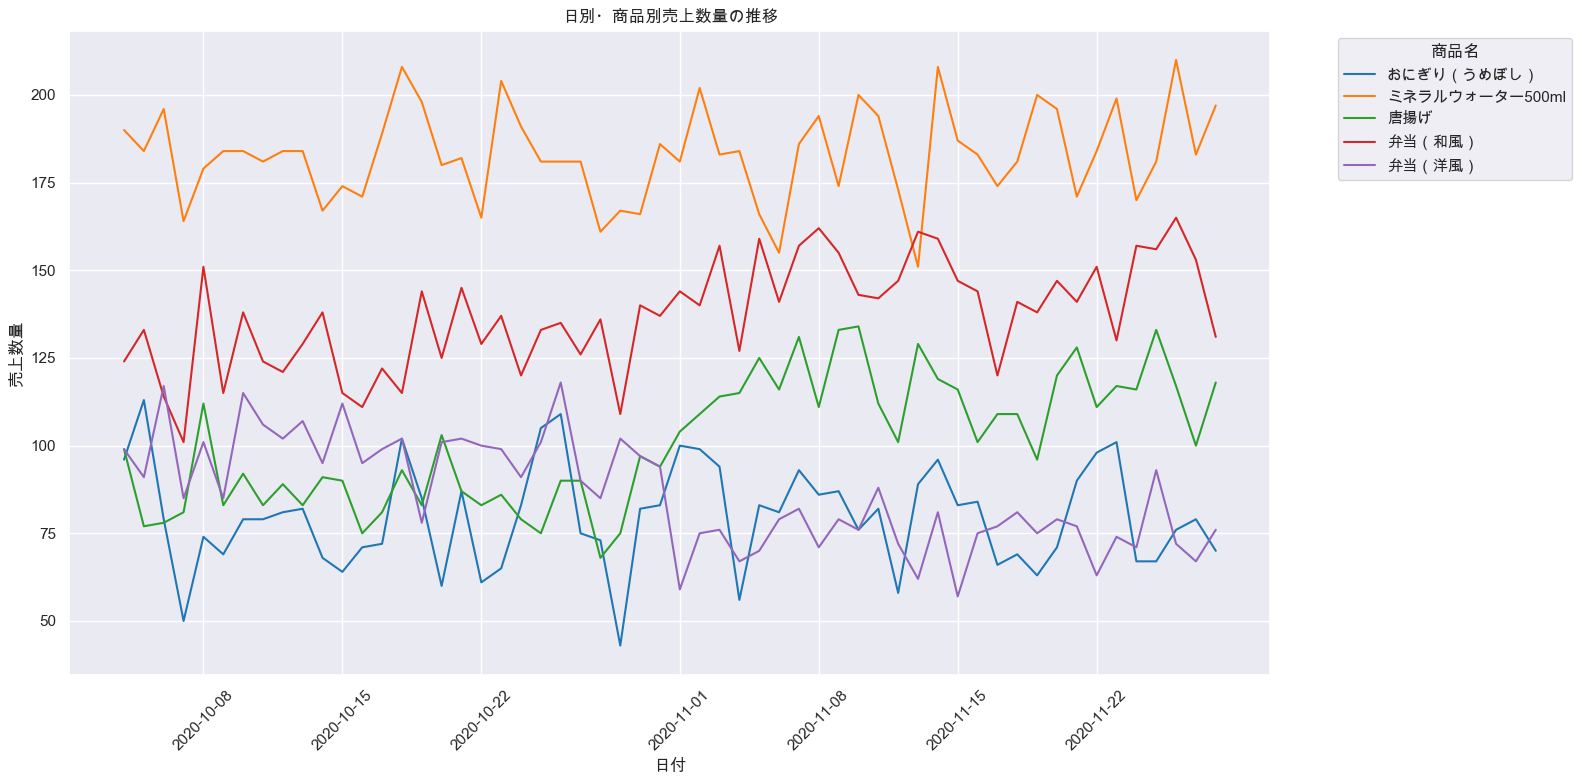

In [15]:
# 可視化
daily_sales_item = data.groupby(
    [pd.Grouper(key='datetime', freq='D'), 'item_name']
)['salescnt'].sum().reset_index()

plt.figure(figsize=(16,8))
sns.lineplot(
    data=daily_sales_item,
    x='datetime',
    y='salescnt',
    hue='item_name',      
    palette='tab10'
)

plt.xlabel('日付')
plt.ylabel('売上数量')
plt.title('日別・商品別売上数量の推移')
plt.xticks(rotation=45)
plt.legend(title='商品名', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


唐揚げと和風弁当は10月末にやや販売が増加したものの、目立った変化は見られなかった。その他の商品は安定して推移している。

### レシートごとの販売金額を確認して、顧客の需要や嗜好を理解

In [16]:
data.head(2)

,receipt_no,user_id,item_id,salescnt,datetime,item_name,category_1,category_2,category_3,volume,salesprice,shop_flg
0,5307465824,34860083,s_00001,1.0,2020-10-04 00:06:47,弁当（和風）,食料,冷蔵,弁当,600,500,0
1,5307465824,34860083,s_00004,1.0,2020-10-04 00:06:47,唐揚げ,食料,ホットスナック,揚げ物,160,250,0


In [17]:
# レシートごとの販売金額を確認
data['salesamount'] = data['salescnt'] * data['salesprice']
receipt_distribution = data.groupby(['receipt_no']).agg({'salesamount':'sum','salescnt':'sum'}).reset_index()
receipt_distribution

,receipt_no,salesamount,salescnt
0,5307465824,750.0,2.0
1,5307465825,500.0,1.0
2,5307465826,680.0,2.0
3,5307465827,150.0,1.0
4,5307465828,150.0,1.0
...,...,...,...
22286,5307488110,670.0,2.0
22287,5307488111,670.0,2.0
22288,5307488112,750.0,1.0
22289,5307488113,670.0,2.0


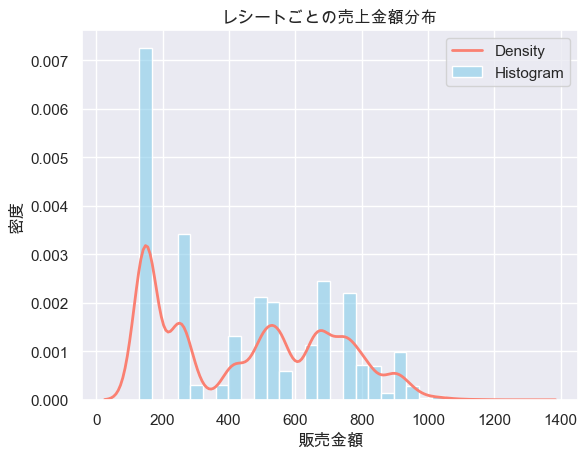

In [18]:
# 可視化
sns.histplot(receipt_distribution['salesamount'], bins=30, color='skyblue', alpha=0.6, stat='density', label='Histogram')
sns.kdeplot(receipt_distribution['salesamount'], color='salmon', linewidth=2, label='Density')

plt.title('レシートごとの売上金額分布')
plt.xlabel('販売金額')
plt.ylabel('密度')
plt.legend()
plt.show()


### 時間帯ごとの販売金額を確認して、顧客の需要や嗜好を理解

In [19]:
# 販売時間に基づいて時間帯ラベルを作成
data['hour'] = data['datetime'].dt.hour
def time_band(h):
    if 0 <= h < 5:
        return '深夜（0-5）'
    elif 5 <= h < 10:
        return '朝（5-10）'
    elif 10 <= h < 14:
        return '昼（10-14）'
    elif 14 <= h < 17:
        return '夕方（14-17）'
    else:
        return '夜（17-12）'

data['time_flag'] = data['hour'].apply(time_band)

In [20]:
# 時間帯ごとの販売金額を確認
time_distribution = data.groupby(['time_flag']).agg({'salesamount':'sum','salescnt':'sum'}).reset_index()
time_distribution

,time_flag,salesamount,salescnt
0,夕方（14-17）,1262660.0,4098.0
1,夜（17-12）,2896930.0,9388.0
2,昼（10-14）,1695160.0,5560.0
3,朝（5-10）,2167280.0,7035.0
4,深夜（0-5）,2099840.0,6808.0


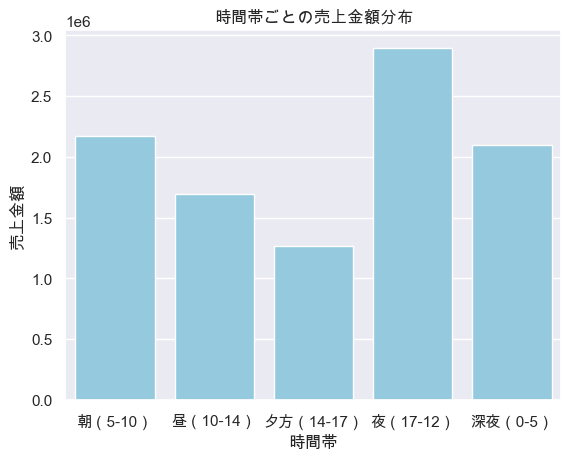

In [21]:
# 可視化
order = ['朝（5-10）', '昼（10-14）', '夕方（14-17）', '夜（17-12）', '深夜（0-5）']
time_distribution = time_distribution.set_index('time_flag').loc[order].reset_index()

sns.barplot(
    data=time_distribution,
    x='time_flag',
    y='salesamount',
    order=['朝（5-10）', '昼（10-14）', '夕方（14-17）', '夜（17-12）', '深夜（0-5）'],
    color='skyblue'
)

plt.title('時間帯ごとの売上金額分布')
plt.xlabel('時間帯')
plt.ylabel('売上金額')
plt.show()

### 時間帯・レシートごとの販売金額を確認して、顧客の需要や嗜好を理解¶

In [22]:
# 時間帯・レシートごとの販売金額を確認
time_recepit_distribution = data.groupby(['time_flag','receipt_no']).agg({'salesamount':'sum','salescnt':'sum'}).reset_index()
time_recepit_distribution

,time_flag,receipt_no,salesamount,salescnt
0,夕方（14-17）,5307466070,700.0,2.0
1,夕方（14-17）,5307466071,150.0,1.0
2,夕方（14-17）,5307466072,550.0,1.0
3,夕方（14-17）,5307466073,800.0,2.0
4,夕方（14-17）,5307466074,150.0,1.0
...,...,...,...,...
22286,深夜（0-5）,5307487794,750.0,1.0
22287,深夜（0-5）,5307487795,150.0,1.0
22288,深夜（0-5）,5307487796,750.0,1.0
22289,深夜（0-5）,5307487797,250.0,1.0


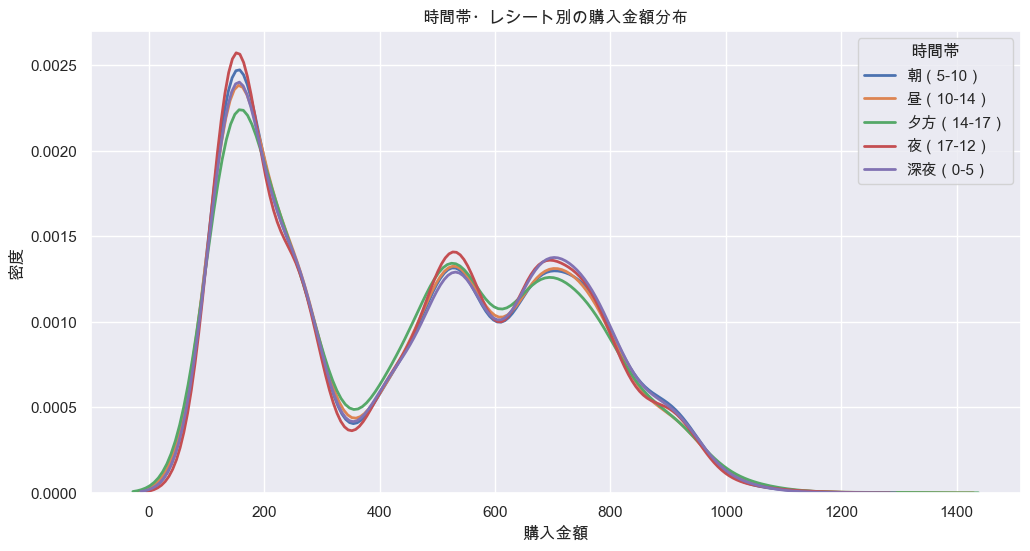

In [23]:
# 可視化
order = ['朝（5-10）', '昼（10-14）', '夕方（14-17）', '夜（17-12）', '深夜（0-5）']
plt.figure(figsize=(12,6))

for t in order:
    subset = time_recepit_distribution[time_recepit_distribution['time_flag'] == t]
    sns.kdeplot(
        subset['salesamount'], 
        linewidth=2, 
        label=t   # 每条线的 Japanese 标签
    )

plt.title('時間帯・レシート別の購入金額分布')
plt.xlabel('購入金額')
plt.ylabel('密度')
plt.legend(title='時間帯')
plt.show()

<font color='red'>コンビニにおける食料品の顧客消費は非常に安定しており、主な需要は以下の2種類で構成されます：

- 低価格で即購入・即退店型（約200円） → 高頻度・高流量
- 弁当類（500〜700円） → 高客単価・安定した売上

<font color='red'>さらに、これら2種類の需要は時間帯にほとんど影響されないため、商品更新は主にこの2種類の需要を中心に行うべきです。

- 低価格の即買い商品：高頻度の商品仕入れと多様な選択肢を提供
- 弁当類：品質・味・組み合わせの最適化により、安定した売上を確保

### 会員・非会員の購入分布と人数分布を確認

In [24]:
# 会員IDに基づいて会員フラグを付与
data['member_flag'] = data['user_id'].apply(lambda x: False if x == 0 else True)

In [25]:
# 会員と非会員の売上金額の割合を確認
member_group_res = data.groupby(['member_flag']).agg({'salesamount':'sum','salescnt':'sum'}).reset_index()
member_group_res

,member_flag,salesamount,salescnt
0,False,5021720.0,16197.0
1,True,5100150.0,16692.0


In [26]:
# 会員と非会員の人数を確認
member_count = data.groupby('member_flag').size().reset_index(name='count')
member_count

,member_flag,count
0,False,15349
1,True,15771


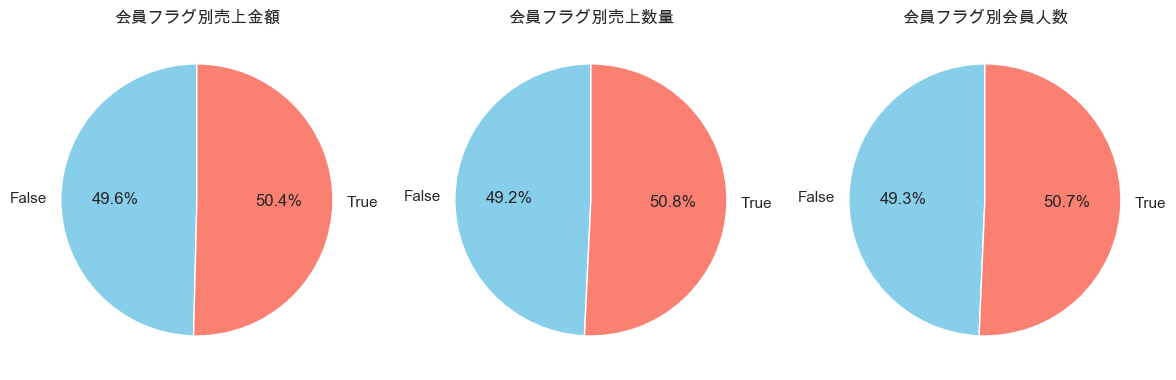

In [27]:
#可視化k

fig, axes = plt.subplots(1, 3,figsize = (12,8))  

# 左边：销售额
axes[0].pie(member_group_res['salesamount'], 
            labels=member_group_res['member_flag'], 
            autopct='%1.1f%%', 
            startangle=90, 
            colors=['skyblue','salmon'])
axes[0].set_title('会員フラグ別売上金額')

# 右边：销量
axes[1].pie(member_group_res['salescnt'], 
            labels=member_group_res['member_flag'], 
            autopct='%1.1f%%', 
            startangle=90, 
            colors=['skyblue','salmon'])
axes[1].set_title('会員フラグ別売上数量')

axes[2].pie(member_count['count'], 
            labels=member_count['member_flag'], 
            autopct='%1.1f%%', 
            startangle=90, 
            colors=['skyblue','salmon'])
axes[2].set_title('会員フラグ別会員人数')

plt.tight_layout()
plt.show()


データ分布は均等で、会員と非会員の売上金額や人数に差は見られません。  
つまり、ポイントカードの発行は売上の増加にはほとんど影響を与えていないと考えられます。

考えられる理由：
- キャンペーンや報酬制度が不明確で、購買を促せていない  
- データ量や観測期間が短く、長期的な効果を反映できていない  

## 查看会员和非会员中销量最好的商品类别

In [28]:
# 商品の階層を確認
kaisou_df = item_df.iloc[:,2:5].drop_duplicates()
kaisou_df

,category_1,category_2,category_3
0,食料,冷蔵,弁当
2,食料,冷蔵,おにぎり
3,食料,ホットスナック,揚げ物
4,食料,ドリンク,水
7,食料,ドリンク,コーヒー


In [29]:
# 会員フラグごと・カテゴリー３ごとの売上金額分布を確認
sales_category3_df = data.groupby(['member_flag','category_3'])['salescnt'].sum().reset_index()
sales_category2_df = data.groupby(['member_flag','category_2'])['salescnt'].sum().reset_index()
sales_item_df = data.groupby(['member_flag','item_name'])['salescnt'].sum().reset_index()
display(sales_category2_df.head(),sales_category3_df.head(),sales_item_df.head())

,member_flag,category_2,salescnt
0,False,ドリンク,4937.0
1,False,ホットスナック,2864.0
2,False,冷蔵,8396.0
3,True,ドリンク,5312.0
4,True,ホットスナック,2797.0


,member_flag,category_3,salescnt
0,False,おにぎり,2140.0
1,False,弁当,6256.0
2,False,揚げ物,2864.0
3,False,水,4937.0
4,True,おにぎり,2314.0


,member_flag,item_name,salescnt
0,False,おにぎり（うめぼし）,2140.0
1,False,ミネラルウォーター500ml,4937.0
2,False,唐揚げ,2864.0
3,False,弁当（和風）,3859.0
4,False,弁当（洋風）,2397.0


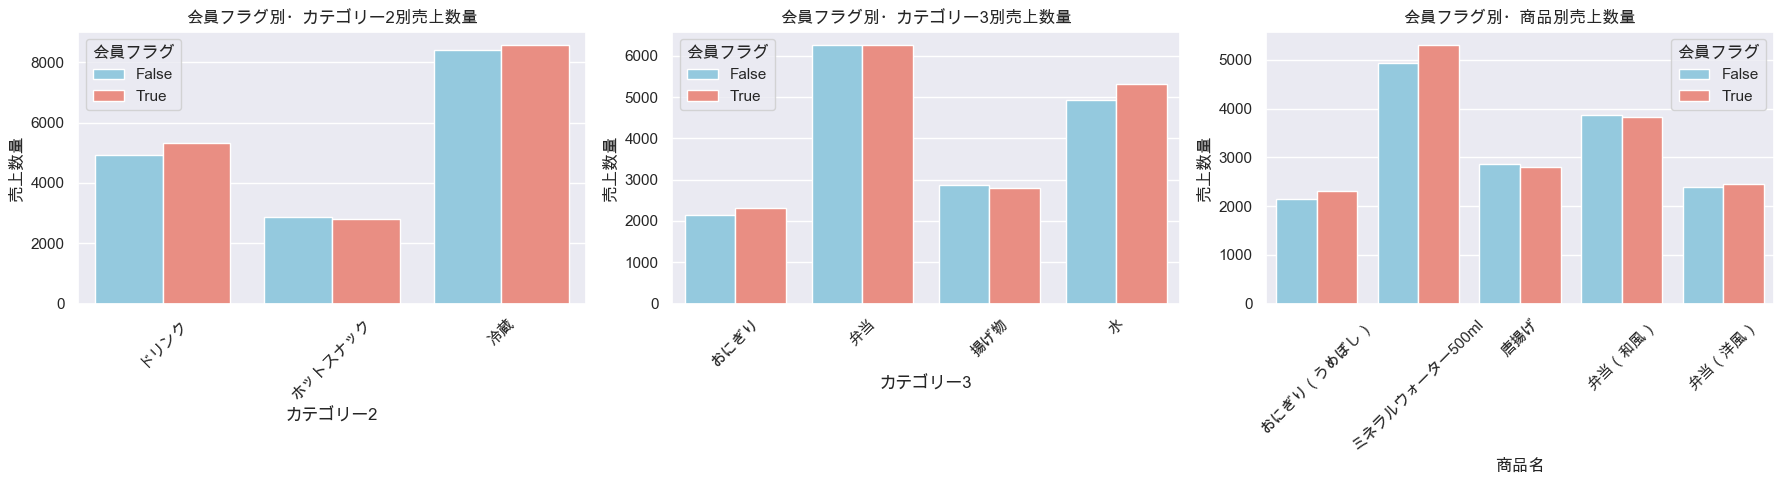

In [30]:
# 可視化
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# 子图1：カテゴリー2
sns.barplot(data=sales_category2_df, x='category_2', y='salescnt', hue='member_flag', ax=axes[0], palette=['skyblue','salmon'])
axes[0].set_xlabel('カテゴリー2')
axes[0].set_ylabel('売上数量')
axes[0].set_title('会員フラグ別・カテゴリー2別売上数量')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='会員フラグ')

# 子图2：カテゴリー3
sns.barplot(data=sales_category3_df, x='category_3', y='salescnt', hue='member_flag', ax=axes[1], palette=['skyblue','salmon'])
axes[1].set_xlabel('カテゴリー3')
axes[1].set_ylabel('売上数量')
axes[1].set_title('会員フラグ別・カテゴリー3別売上数量')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='会員フラグ')

# 子图3：商品別
sns.barplot(data=sales_item_df, x='item_name', y='salescnt', hue='member_flag', ax=axes[2], palette=['skyblue','salmon'])
axes[2].set_xlabel('商品名')
axes[2].set_ylabel('売上数量')
axes[2].set_title('会員フラグ別・商品別売上数量')
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend(title='会員フラグ')

plt.tight_layout()
plt.show()


カテゴリ2とカテゴリ3において、データ分布は均等で、会員と非会員の売上金額や人数に大きな差は見られません。  
商品の「ミネラルウオーター500ml」については、会員の販売量がやや多いものの、明らかな差とは言えません。  
したがって、ポイントカードの発行は売上の増加にはほとんど影響を与えていないと考えられます。

また、カテゴリ別の売上傾向は以下の通りです：

- **カテゴリー2別**：冷蔵商品が最も人気  
- **カテゴリー3別**：弁当が最も人気  
- **商品別**：ミネラルウオーター500mlが最も人気ですが、和風弁当は洋風弁当より価格が安いため、販売数量はさらに多くなっています。


### 各商品の売れやすい価格帯の分布を確認


In [31]:
# 価格は連続変数のため、価格帯ごとに区切って離散化する
bins = pd.interval_range(start=data['salesprice'].min()-1, end=data['salesprice'].max(), periods=10)
data['price_bin'] = pd.cut(data['salesprice'], bins=bins)

In [32]:
price_bin_df = data.groupby(['price_bin','item_name'])['salescnt'].sum().reset_index()
price_bin_df

,price_bin,item_name,salescnt
0,"(129.0, 191.1]",おにぎり（うめぼし）,4454.0
1,"(129.0, 191.1]",ミネラルウォーター500ml,10249.0
2,"(129.0, 191.1]",唐揚げ,0.0
3,"(129.0, 191.1]",弁当（和風）,0.0
4,"(129.0, 191.1]",弁当（洋風）,0.0
5,"(191.1, 253.2]",おにぎり（うめぼし）,0.0
6,"(191.1, 253.2]",ミネラルウォーター500ml,0.0
7,"(191.1, 253.2]",唐揚げ,5661.0
8,"(191.1, 253.2]",弁当（和風）,0.0
9,"(191.1, 253.2]",弁当（洋風）,0.0


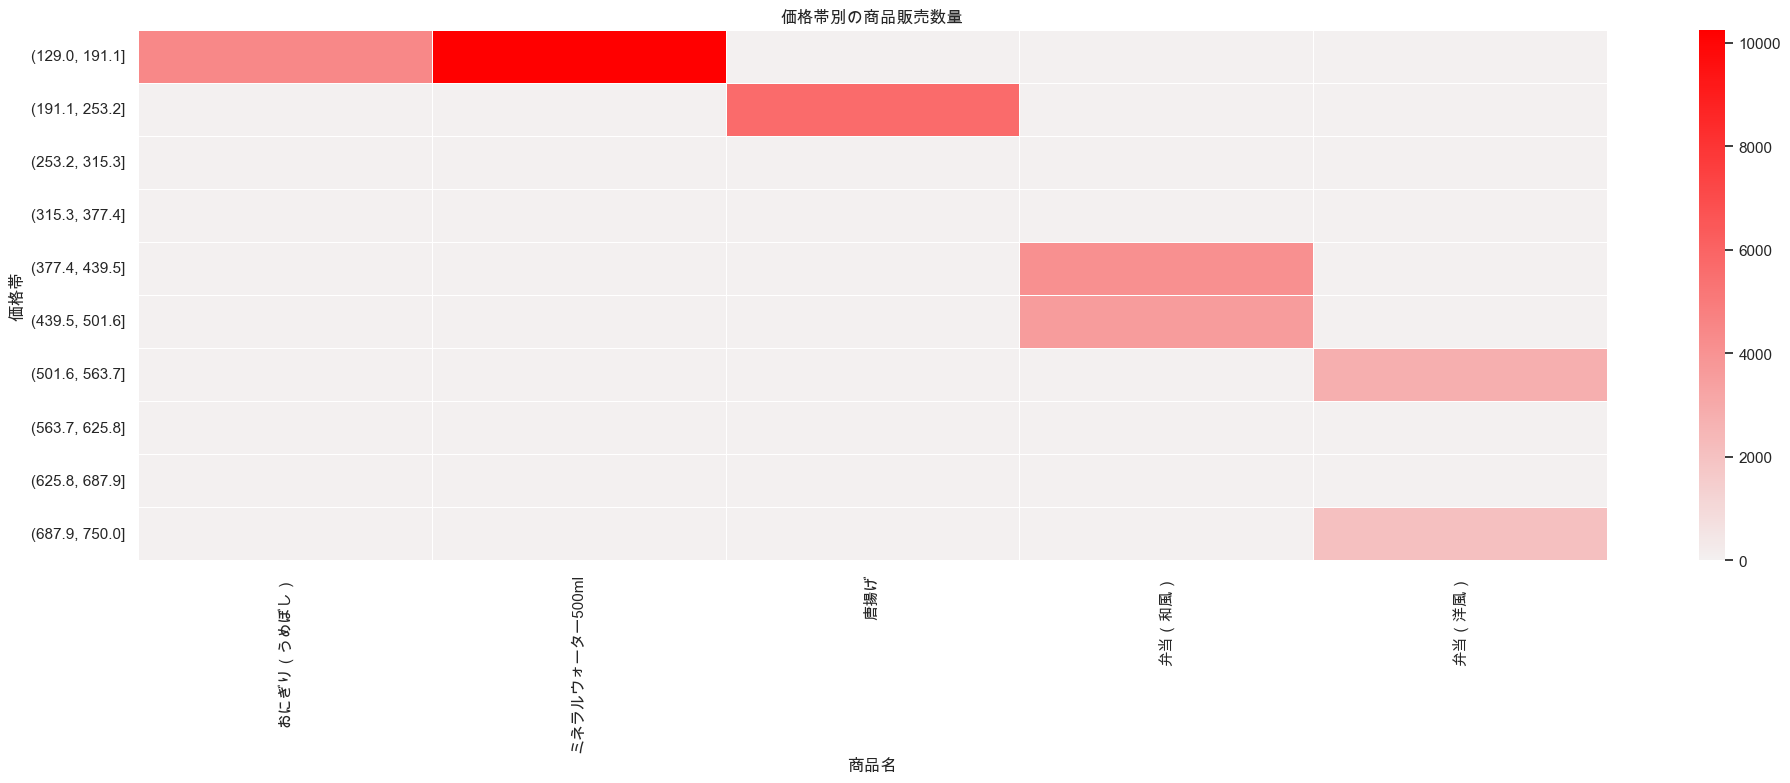

In [33]:
# 可視化
pivot_df = price_bin_df.pivot(index='price_bin', columns='item_name', values='salescnt').fillna(0)
cmap = sns.light_palette("red", as_cmap=True)  

# ヒートマップを作成
plt.figure(figsize=(20,8))
sns.heatmap(pivot_df, cmap=cmap, linewidths=0.5, annot=False)
plt.title('価格帯別の商品販売数量')
plt.xlabel('商品名')
plt.ylabel('価格帯')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- 寿司は129〜191円の価格帯で最も売れています。  
- ミネラルウォーターは129〜191円の価格帯で最も売れています。  
- フライドチキンは191〜253円の価格帯で最も売れています。  
- 弁当（和風）は377〜501円の価格帯で最も売れています。  
- <font color='red'>弁当（洋風）は501〜563円および687〜750円の価格帯で最も売れていますが、売上の高い洋風弁当では価格帯の中央に売れない層が存在します。  

そのため、洋風弁当については価格帯による顧客の需要差が明確であり、商品更新時にはターゲットを分ける必要があります。  
価格に敏感な顧客向けにはコストパフォーマンスの高い商品を開発し、品質を重視し価格に敏感でない顧客向けには高品質の商品を開発することが推奨されます。




# HML分析
EDAの結果から、会員と非会員は売上数量に明確な影響を与えていないことが分かりました。  
そのため、この状況下では会員と非会員の商品嗜好を探索することは意味がなく、代わりに優良顧客と一般顧客の商品嗜好を分析します。  

具体的には、2か月間の総売上金額および総販売数量の上位20％の顧客を「優良顧客」と定義し、残りを「一般顧客」とします。  
<font color='red'>これにより、優良顧客と一般顧客が日常的に購入する商品に差があるかを分析し、今後の商品更新や施策に活かすことを目的とします。


In [34]:
data.head(2)

,receipt_no,user_id,item_id,salescnt,datetime,item_name,category_1,category_2,category_3,volume,salesprice,shop_flg,salesamount,hour,time_flag,member_flag,price_bin
0,5307465824,34860083,s_00001,1.0,2020-10-04 00:06:47,弁当（和風）,食料,冷蔵,弁当,600,500,0,500.0,0,深夜（0-5）,True,"(439.5, 501.6]"
1,5307465824,34860083,s_00004,1.0,2020-10-04 00:06:47,唐揚げ,食料,ホットスナック,揚げ物,160,250,0,250.0,0,深夜（0-5）,True,"(191.1, 253.2]"


In [35]:
#各会員の総購入数量および総購入金額を計算
member_data = data.loc[data['user_id'] != 0].reset_index(drop = True) 
user_sales_df = member_data.groupby(['user_id']).agg({'salescnt':'sum','salesamount':'sum'}).reset_index()
user_sales_df.head()

,user_id,salescnt,salesamount
0,10000222,9.0,2770.0
1,10016128,4.0,1500.0
2,10104687,4.0,1000.0
3,10108710,12.0,1560.0
4,10196807,13.0,5410.0


In [36]:
# 売上数量および売上金額の分布を確認
user_sales_df[['salescnt','salesamount']].describe(percentiles=[0.8,1])

,salescnt,salesamount
count,2087.000000,2087.000000
mean,7.998083,2443.770963
std,3.447037,1143.552232
min,2.000000,500.000000
50%,8.000000,2250.000000
80%,10.000000,3280.000000
100%,25.000000,9600.000000
max,25.000000,9600.000000


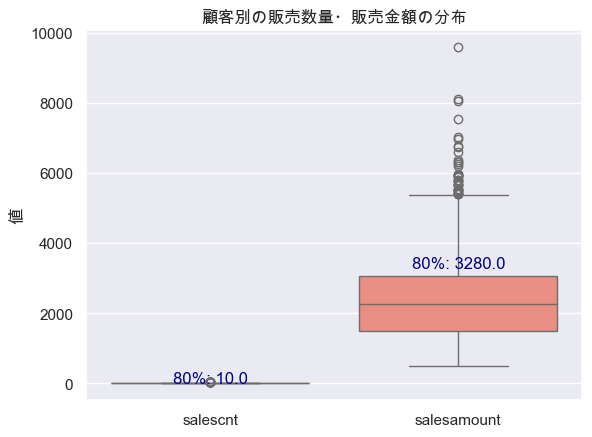

In [37]:
#可視化
sns.boxplot(data=user_sales_df[['salescnt','salesamount']], palette=['skyblue','salmon'])
plt.title('顧客別の販売数量・販売金額の分布')
plt.ylabel('値')

# 上位20％の分位点をマーク
for i, col in enumerate(['salescnt','salesamount']):
    q80 = user_sales_df[col].quantile(0.8)
    plt.text(i, q80, f'80%: {q80:.1f}', horizontalalignment='center', color='darkblue')

plt.show()

In [38]:
# そのため、総購入数量が10以上かつ総購入金額が3280円以上の顧客を優良顧客とし、その他を一般顧客と定義して、両者の購買傾向（嗜好商品）を分析

In [39]:
# 優良顧客にフラグを付与
hh_user_list = user_sales_df.loc[(user_sales_df['salescnt'] >=10) & (user_sales_df['salesamount'] >=3280 )]['user_id'].unique()
member_data['hh_flag'] = member_data['user_id'].isin(hh_user_list)

hh_flag
False    12298
True      3473
dtype: int64

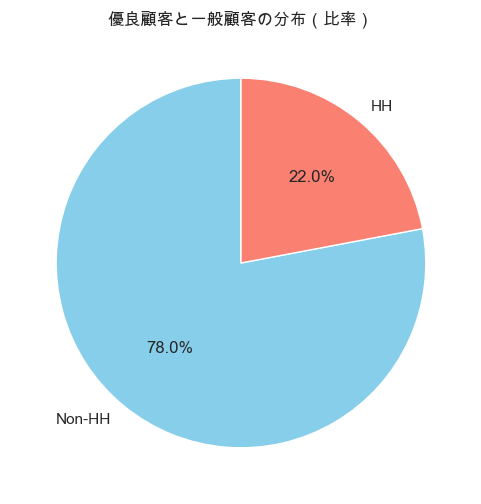

In [40]:
# 優良顧客と一般顧客の分布を確認
user_count = member_data.groupby(['hh_flag']).size()
display(user_count)

# 可視化
plt.figure(figsize=(6,6))
plt.pie(user_count, labels=['Non-HH', 'HH'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('優良顧客と一般顧客の分布（比率）')
plt.show()

このデータでは、優良顧客（HH）が22％、一般顧客が78％と、サンプルの分布が偏っているため、単純に頻度だけで顧客の嗜好を分析するのは適切ではありません。  
そのため、クロス集計を行います。


,hh_flag,salesamount,salescnt
0,False,314.963409,1.07489
1,True,353.219119,1.00000


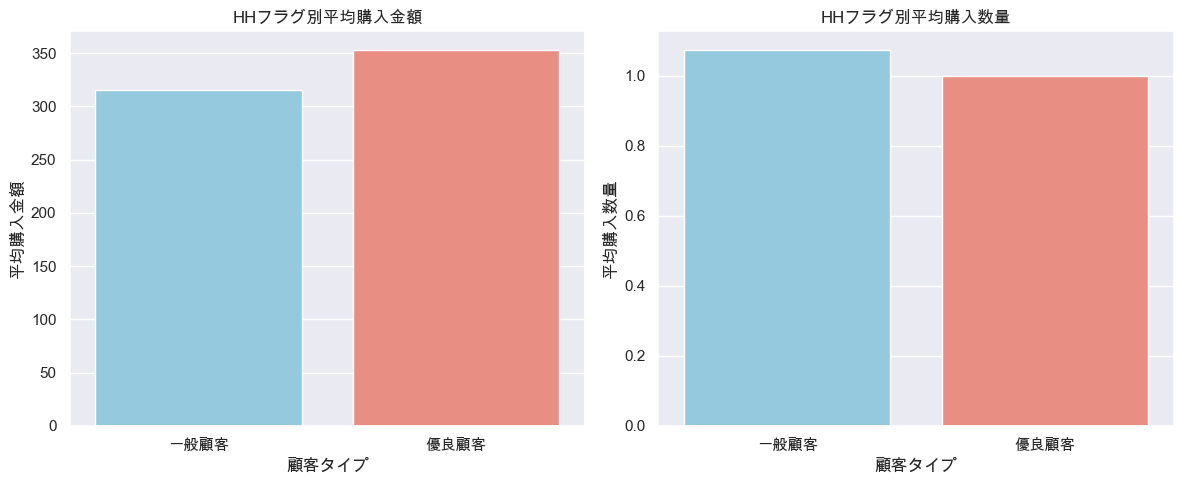

In [41]:
# 優良顧客（HH）と一般顧客の購入数量および購入金額の分布を確認
member_distribution = member_data.groupby(['hh_flag']).agg({'salesamount':'mean','salescnt':'mean'}).reset_index()
display(member_distribution)

# 可視化
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# 平均購入金額
sns.barplot(data=member_distribution, x='hh_flag', y='salesamount', palette=['skyblue','salmon'], ax=axes[0])
axes[0].set_xlabel('顧客タイプ')
axes[0].set_ylabel('平均購入金額')
axes[0].set_title('HHフラグ別平均購入金額')
axes[0].set_xticklabels(['一般顧客','優良顧客'])

# 平均購入数量
sns.barplot(data=member_distribution, x='hh_flag', y='salescnt', palette=['skyblue','salmon'], ax=axes[1])
axes[1].set_xlabel('顧客タイプ')
axes[1].set_ylabel('平均購入数量')
axes[1].set_title('HHフラグ別平均購入数量')
axes[1].set_xticklabels(['一般顧客','優良顧客'])

plt.tight_layout()
plt.show()

優良顧客と一般顧客では、1回あたりの購入数量に大きな差は見られません。  
主な違いは、1回あたりの購入金額にあり、約50円の差があります。

In [42]:
# 计算每组购买数量总和
category_hh = member_data.groupby(['hh_flag', 'category_3'])['salescnt'].sum().reset_index()

# 也可以计算购买金额
category_hh_amount = member_data.groupby(['hh_flag', 'category_3'])['salesamount'].sum().reset_index()


## 交叉分析

In [43]:
member_data.head(2)

,receipt_no,user_id,item_id,salescnt,datetime,item_name,category_1,category_2,category_3,volume,salesprice,shop_flg,salesamount,hour,time_flag,member_flag,price_bin,hh_flag
0,5307465824,34860083,s_00001,1.0,2020-10-04 00:06:47,弁当（和風）,食料,冷蔵,弁当,600,500,0,500.0,0,深夜（0-5）,True,"(439.5, 501.6]",False
1,5307465824,34860083,s_00004,1.0,2020-10-04 00:06:47,唐揚げ,食料,ホットスナック,揚げ物,160,250,0,250.0,0,深夜（0-5）,True,"(191.1, 253.2]",False


useful_varリストに含まれる特徴量と購入行動のクロス集計分析結果は以下の通りです：
................category_2別の売上数量................
category_2      ドリンク   ホットスナック        冷蔵
hh_flag                                 
False       0.354414  0.162645  0.482941
True        0.180536  0.186294  0.633170 

................category_3別の売上数量................
category_3      おにぎり        弁当       揚げ物         水
hh_flag                                           
False       0.150768  0.332173  0.162645  0.354414
True        0.092427  0.540743  0.186294  0.180536 

................item_name別の売上数量................
item_name  おにぎり（うめぼし）  ミネラルウォーター500ml       唐揚げ    弁当（和風）    弁当（洋風）
hh_flag                                                            
False        0.150768        0.354414  0.162645  0.176488  0.155685
True         0.092427        0.180536  0.186294  0.429024  0.111719 



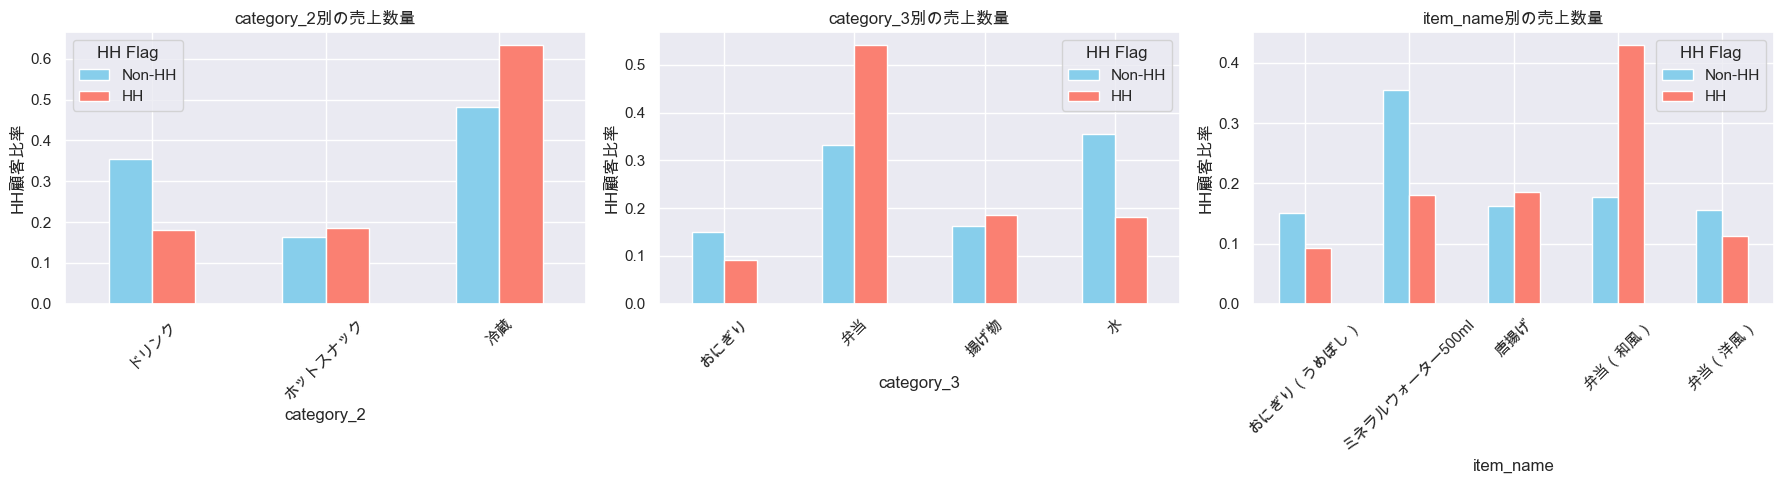

In [44]:
# 分析対象とする特徴量のリスト
useful_var = ['category_2', 'category_3', 'item_name']

print('useful_varリストに含まれる特徴量と購入行動のクロス集計分析結果は以下の通りです：')

num_features = len(useful_var)
cols = 3  # 1行に3つのグラフ
rows = (num_features + cols - 1) // cols  # 総行数を計算
plt.figure(figsize=(6*cols, 5*rows))  # figsizeも調整
a = 0

for i in useful_var:
    crosstab_result = pd.crosstab(
        member_data['hh_flag'], 
        member_data[i], 
        values=member_data['salescnt'], 
        aggfunc='sum', 
        normalize='index'
    )
    
    print('................{}別の売上数量................'.format(i))
    print(crosstab_result, '\n')

    # 可視化
    a += 1
    plt.subplot(rows, cols, a)
    crosstab_result_T = crosstab_result.T
    crosstab_result_T.plot(kind='bar', stacked=False, ax=plt.gca(), color=['skyblue', 'salmon'])
    plt.title(f'{i}別の売上数量' )
    plt.xlabel(i)
    plt.ylabel('HH顧客比率')
    plt.xticks(rotation=45)
    plt.legend(title='HH Flag', labels=['Non-HH', 'HH'])

plt.tight_layout()
plt.show()


In [45]:
kaisou_df

,category_1,category_2,category_3
0,食料,冷蔵,弁当
2,食料,冷蔵,おにぎり
3,食料,ホットスナック,揚げ物
4,食料,ドリンク,水
7,食料,ドリンク,コーヒー


図から以下のことがわかります：
- カテゴリー別：優良顧客と一般顧客の最も大きな差は<font color='red'>「冷蔵・弁当」</font>にあり、優良顧客はこのカテゴリーをより好む傾向があります。
- 商品別：優良顧客と一般顧客の最も大きな差は<font color='red'>「和風弁当」</font>にあり、優良顧客はこの商品をより好む傾向があります。

<font color='blue'>したがって、次に優良顧客と一般顧客の「和風弁当」における容量の好みの違いを探索します。

In [46]:
# # 和風弁当データを抽出
bento_data = member_data.loc[member_data['item_name'] == '弁当（和風）'].reset_index()

volume        500       600
hh_flag                    
False    0.535362  0.464638
True     0.536913  0.463087 



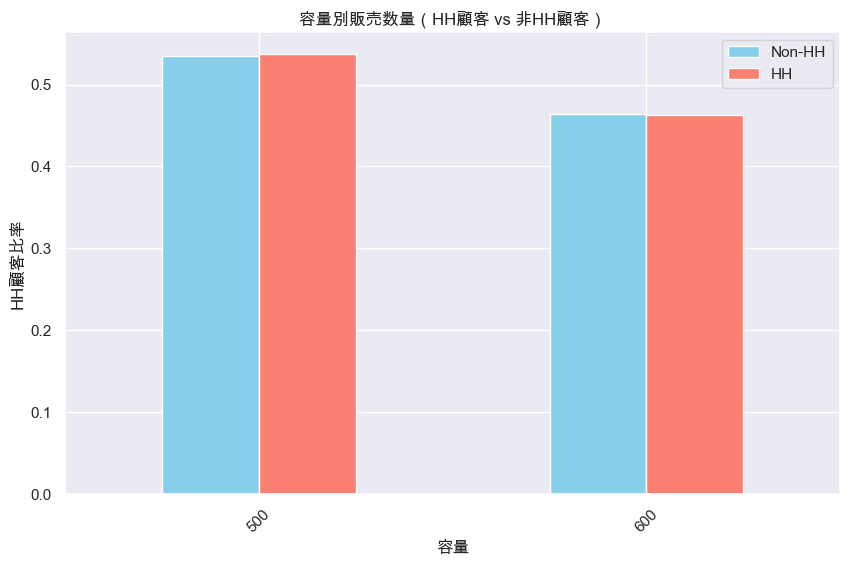

In [47]:
# # 優良顧客と一般顧客の和風弁当における容量ごとの購入数量のクロス集計
crosstab_result = pd.crosstab(
    bento_data['hh_flag'],
    bento_data['volume'],
    values=bento_data['salescnt'],
    aggfunc='sum',
    normalize='index'
)
print(crosstab_result, '\n')

# 可視化
crosstab_result.T.plot(kind='bar', figsize=(10,6),color = ['skyblue','salmon'])
plt.title('容量別販売数量（HH顧客 vs 非HH顧客）')
plt.xlabel('容量')
plt.ylabel('HH顧客比率')
plt.xticks(rotation=45)
plt.legend(['Non-HH','HH'])
plt.show()


図から、優良顧客（HH）と一般顧客（Non-HH）は、和風弁当の容量に対して明確な嗜好の差は見られないことが分かります

# サマリと施策提案

<font color='red'> 1. コンビニ食品類顧客の需要に対しての改善提案</font>

<b>需要1：低価格即買い商品（約200円）
- **特徴**：購入頻度が高く、客数も多い
- **施策**：
  - 欠品を避ける
  - 商品種類を素早く更新し、多様な選択肢を提供

<b>需要2：弁当類商品（500〜700円）
- **特徴**：客単価が高く、売上が安定
  - **洋風弁当**：501〜563円、687〜750円に集中、価格帯中央に購入しない顧客層が存在
  - **和風弁当**：優良顧客と一般顧客の嗜好差が最も大きい
- **施策**：
  - **洋風弁当**：価格感度に応じたターゲット分け
    - 価格に敏感な顧客：コストパフォーマンスの高い商品を開発
    - 価格に敏感でない、品質重視の顧客：高品質の商品を開発
  - **和風弁当**：和風弁当を中心に利益率を向上、優良顧客向けの販売促進による売上・リピート率向上
    - プロモーション施策と連動
    - 商品リニューアル時に重視


<font color='red'> 2. ポイントカード制度の課題と改善提案</font>

**現状**：会員と非会員の売上に大きな差はなく、ポイントカード制度の効果は限定的

<b>改善の方向性
1. ユーザーのサンクコストを増やす
2. ユーザーの利用習慣を育てる

<b>1.サンクコストを増やす施策
- 会員ランク制度を導入し、一定ランク達成で毎月クーポンや特典を付与
- 和風弁当＋飲料セットを会員限定で軽い割引提供
- 会員のポイント付与率を非会員より高く設定し、心理的投資を増加

<b>利用習慣を育てる施策
- 毎月1回の「会員デー」イベント：ポイント2倍や特定商品（和風弁当）のクーポン付与
- アプリやLINEでの通知：
  - 毎日のおすすめ商品
  - 残ポイントで交換できる商品
  - 購入履歴やリマインダーで購買習慣を促進
- 累計購入特典：
  - 例：和風弁当を5回連続購入で、次回割引やプレゼントを付与し、継続購入を促進
